In [53]:
#lets import some libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import pandas_profiling as pp

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [54]:
#reading the dataset
dp = pd.read_csv("diamonds.csv")
dp.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [55]:
# it is an unwanted column with no use so lets drop it
dp.drop('Unnamed: 0', axis = 1, inplace = True)

In [56]:
#checking our datatype
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## EDA

In [57]:
#checking for null values which can create problems later
dp.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [58]:
dp.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [59]:
dp["carat"].nunique()

273

<AxesSubplot:xlabel='carat'>

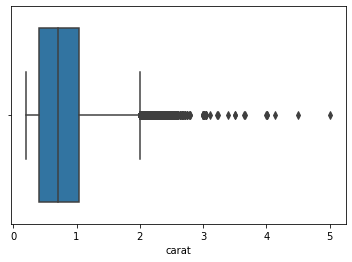

In [60]:
sns.boxplot(dp["carat"])

In [61]:
dp["cut"].dtype

dtype('O')

In [62]:
s = (dp.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [63]:
label_data = dp.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [64]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int32  
 2   color    53940 non-null  int32  
 3   clarity  53940 non-null  int32  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


In [65]:
dp["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [66]:
# there are some zeros in this columns so we are dropping those rows
data = label_data.drop(label_data[label_data["x"]==0].index)
data = label_data.drop(label_data[label_data["y"]==0].index)
data = label_data.drop(label_data[label_data["z"]==0].index)

In [67]:
label_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

<AxesSubplot:xlabel='table'>

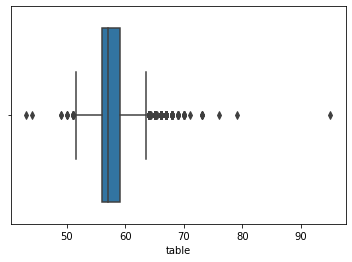

In [68]:
sns.boxplot(label_data["table"])

<AxesSubplot:>

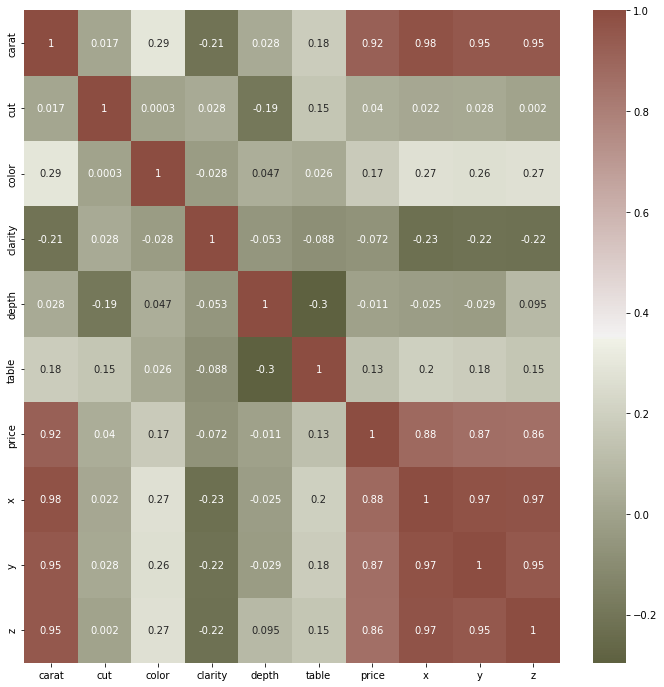

In [69]:
# checking corelation between the columns 

cmap = sns.diverging_palette(90,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

# as we can see there is a strong coorelation between x,y,z, price and carat this columns are important 

## visulaziation

<AxesSubplot:xlabel='carat', ylabel='price'>

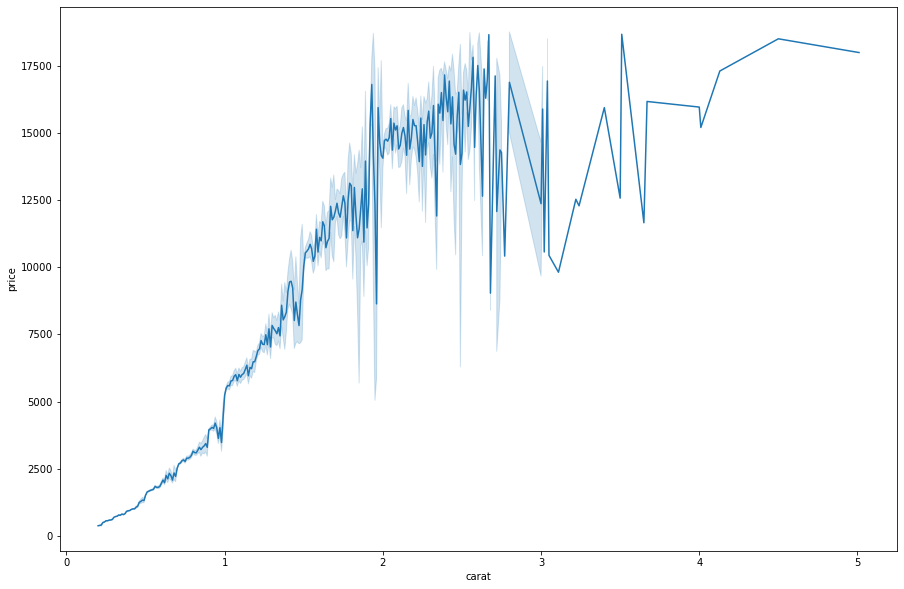

In [70]:
plt.figure(figsize= (15,10))

sns.lineplot( x = label_data["carat"], y = label_data["price"])

# increase in price as the size of diamond increases

<AxesSubplot:xlabel='x'>

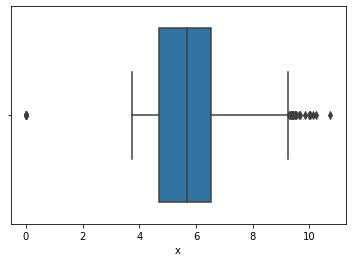

In [71]:
# there are some outliers we will be handling them 
sns.boxplot(label_data["x"])

### outliers of y

In [72]:
new_data = label_data[label_data['y']<10]
new_data =new_data[new_data['y']>0]

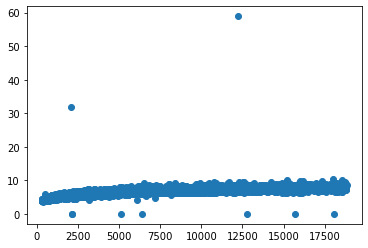

In [73]:
# better representation for outliers
plt.scatter(x = label_data["price"], y = label_data["y"])
plt.show()

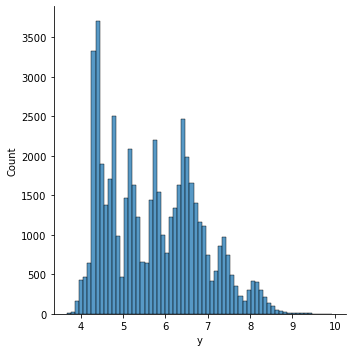

In [74]:
sns.displot(new_data['y'])

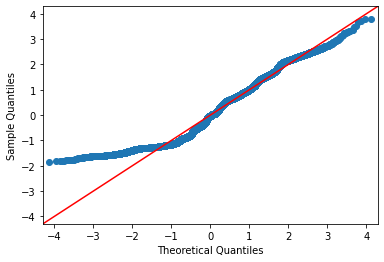

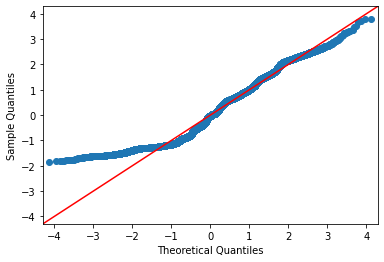

In [75]:
sm.qqplot(new_data["y"], line = '45', fit = True)

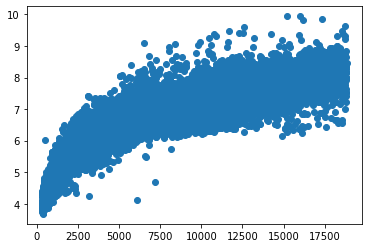

In [76]:
plt.scatter(x = new_data["price"], y = new_data["y"])
plt.show()

<AxesSubplot:xlabel='price', ylabel='y'>

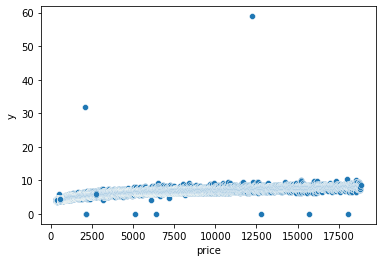

In [77]:
sns.scatterplot(y = label_data['y'] , x = label_data['price'],)

### outliers of x

<AxesSubplot:xlabel='price', ylabel='x'>

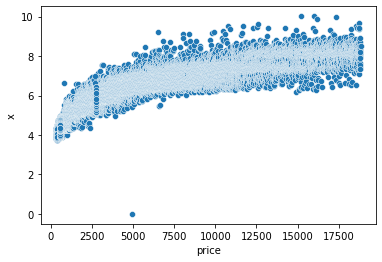

In [78]:
sns.scatterplot(y = new_data['x'] , x = new_data['price'])

In [ ]:
new_data = new_data[new_data['x']<10]
new_data =new_data[new_data['x']>3]

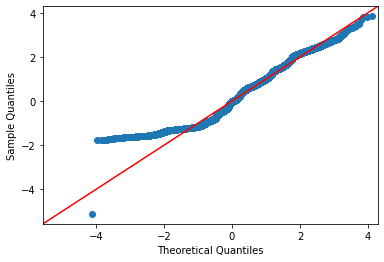

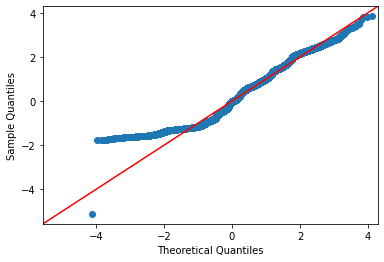

In [79]:
sm.qqplot(new_data["x"], line = '45', fit = True)

### outliers of z

<AxesSubplot:xlabel='price', ylabel='z'>

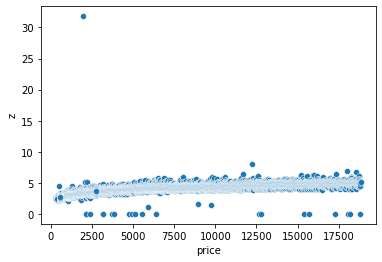

In [81]:
sns.scatterplot(y = label_data['z'] , x = label_data['price'])

<AxesSubplot:xlabel='price', ylabel='z'>

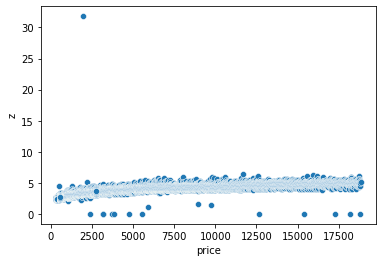

In [82]:
sns.scatterplot(y = new_data['z'] , x = new_data['price'])

In [83]:
new_data = new_data[new_data['z']<7]
new_data =new_data[new_data['z']>2]

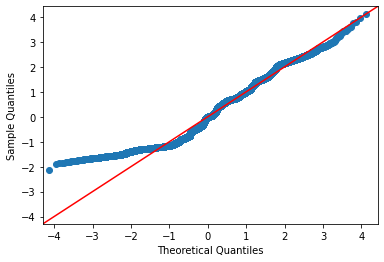

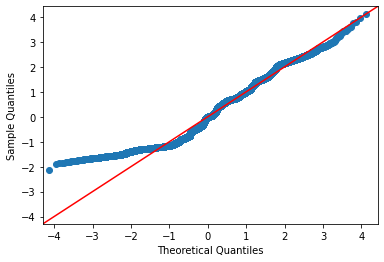

In [84]:
sm.qqplot(new_data["z"], line = '45', fit = True)

## Model training

In [85]:
x = new_data.drop("price", axis = 1)
y = new_data["price"]


In [86]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 23)


In [87]:
x_test

,carat,cut,color,clarity,depth,table,x,y,z
39782,0.33,3,3,1,59.4,59.0,4.54,4.49,2.68
32227,0.31,2,3,6,61.9,54.0,4.35,4.37,2.70
41297,0.34,2,0,6,61.7,57.0,4.52,4.49,2.78
17863,1.50,1,5,2,64.2,56.0,7.25,7.14,4.62
25773,1.24,2,0,7,61.5,57.0,6.88,6.94,4.25
...,...,...,...,...,...,...,...,...,...
38656,0.42,2,0,2,61.9,57.0,4.82,4.77,2.97
29574,0.41,4,1,2,61.1,62.0,4.76,4.83,2.93
38987,0.36,3,3,7,61.9,58.0,4.60,4.54,2.83
24352,2.01,4,4,3,63.4,58.0,8.01,7.94,5.06


In [88]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
35234,0.41,2,5,7,60.7,57.0,4.81,4.84,2.93
40215,0.39,2,1,4,60.2,56.0,4.79,4.78,2.88
30968,0.38,3,5,2,60.2,60.0,4.68,4.65,2.81
51797,0.70,3,0,5,61.3,58.0,5.72,5.67,3.48
21246,1.21,2,2,5,61.3,56.0,6.86,6.91,4.22
...,...,...,...,...,...,...,...,...,...
9708,0.34,1,2,5,64.3,53.0,4.44,4.48,2.87
11196,1.14,4,0,3,59.2,61.0,6.82,6.84,4.04
26589,2.03,3,5,5,60.5,62.0,8.22,8.17,4.96
9260,1.05,2,3,3,62.3,56.0,6.52,6.58,4.08


In [89]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [90]:
model.intercept_

-861.3758437291835

In [91]:
model.coef_

array([11689.64713952,    54.42042839,  -271.01685373,   280.42764603,
         127.42060082,   -83.23361991, -1802.31223635,  3375.18734196,
       -4844.47941028])

## Test data

In [92]:
y_predt = model.predict(x_test)

mse = mean_squared_error(y_test, y_predt)
print("Mean squared error is : ", mse)

rmse = np.sqrt(mse)
print("root mean squared error is : ", rmse)

mae = mean_absolute_error(y_test, y_predt)
print("Mean absoulte error: ", mae)

R2_value = r2_score(y_test, y_predt)
print("R2_score is : ", R2_value)

Mean squared error is :  1735423.6159413904
root mean squared error is :  1317.354779830168
Mean absoulte error:  840.9460369447366
R2_score is :  0.8875863113979153


## Training data

In [93]:
y_predt_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_predt_train)
print("Mean squared error is : ", mse)

rmse = np.sqrt(mse)
print("root mean squared error is : ", rmse)

mae = mean_absolute_error(y_train, y_predt_train)
print("Mean absoulte error: ", mae)

R2_value = r2_score(y_train, y_predt_train)
print("R2_score is : ", R2_value)

Mean squared error is :  1766355.394985335
root mean squared error is :  1329.0430372961348
Mean absoulte error:  849.4647126272642
R2_score is :  0.88954234694532


In [94]:
x_test.head(1)

,carat,cut,color,clarity,depth,table,x,y,z
39782,0.33,3,3,1,59.4,59.0,4.54,4.49,2.68


In [95]:
model.predict([[0.71,2,3,3,61.5,55.0,5.74,5.78,3.54]])

array([2847.71820197])

In [96]:
y_test.head(1)

39782    1094
Name: price, dtype: int64

In [97]:
import pickle
import json

In [98]:
with open ("diamond_price.pkl", "wb")as f:
    pickle.dump(model,f)

In [99]:
# with open('project_data.json', 'w') as f:
#     json.dump(project_data, f)

In [100]:
profile = pp.ProfileReport(new_data)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]